# **1. Preguntas Teóricas**

#### ¿Qué es un paradigma de programación?

##### El paradigma de programación es una manera o estilo de programación de Software, que define como escribir y estructurar estos programas. Los principales paradigmas que existen son los orientados a objetos (utilizado para esta tarea), los imperativos, funcionales y declarativos.

#### ¿En qué se basa la programación orientada a objetos?

##### Consiste en un desarrollo que busca minimizar los errores y ser más eficaz a la hora de programar. Esta programación se basa en el concepto de objetos, organizando programas modulares y representar el mundo real. Los objetos son instancias de clases, que actúan como plantillas que definen los atributos (datos) y métodos (funciones) asociados con el objeto. Este tipo de programación utiliza conceptos como herencia, abstracción y encapsulación.

#### ¿Cuál es la diferencia entre recursividad e iteración, y cómo se relaciona esto con la notación big 𝑂?


##### La principal diferencia entre recursividad e iteración en que la primera es una técnica en la que una función se llama a sí misma para resolver los programas, basandose en dividir un problema en subproblemas más pequeños, hasta llegar a un caso base con solución. Por otro lado se encuentra la iteración, en la cual se repite un ciclo de manera secuencial hasta que se cumpla alguna condición programada, no necesitando un caso base como en el primer caso. 
##### Con respecto a la relación con la notación big 𝑂, esta mide la eficiencia de un algortimo en base al tiempo que demora en ejecutarse o la memoria que utilice. En base a esto, es posible notar que la recursividad tiene una complejidad mayor que la iteración, debido a que llama a más funciones y usa mayor cantidad de memoria, mientras que la iteración es más eficiente en temas de tiempo y espacio.

#### Explicar la diferencia de rendimiento entre 𝑂(1) y 𝑂(𝑛)

##### Como se mencionó anteriormente, la notación big 𝑂 mide la eficiencia de un algortimo en base al tiempo que demora en ejecutarse o la memoria que utilice. La diferencia es que para 𝑂(1) ejecuta en tiempo constante, esto es, no cambia el tiempo de ejecución independiente del tamaño de entrada, siendo el más eficiente que 𝑂(n). Este último término se ejecuta en tiempo lineal, esto significa que el tiempo de ejecución aumenta a medida que el número de entradas aumenta.

#### ¿Cómo se calcula el orden en un programa que funciona por etapas?

##### El orden del programa se calcula sumando las complejidades de cada etapa, pero si hay uno que domina a otro, su orden será el orden total del sistema. 
##### El orden de dominancia está dado por: O(1) < O(log(n)) < O(n) < O(nlog(n)) < O($n^ 2$) < O($2^ n$) < O(n!)

#### ¿Cómo se puede determinar la complejidad temporal de un algoritmo recursivo?


##### Cada vez que la función se llama a si misma, aumenta exponencialmente el orden del sistema ($n^ 2$), ($n^ 3$), etc. Como se dijo antes, a medida que aumenta el orden aumenta la dominancia, cambia el orden del sistema completo, quedándose con el más dominante.

#   **2. Desarrollo Programar Caminos 1**

In [21]:
class PCB:
    def __init__(self, n, m):
        self.n = n  # n filas
        self.m = m  # m columnas

    def iterativo(self):
        dp = [[0] * self.m for _ in range(self.n)]
        
        for i in range(self.n):
            dp[i][0] = 1  
        for j in range(self.m):
            dp[0][j] = 1  
        
        for i in range(1, self.n):
            for j in range(1, self.m):
                dp[i][j] = dp[i-1][j] + dp[i][j-1]
        
        return dp[self.n-1][self.m-1]

    def recursivo(self):
        return self.recursivo_base(0, 0)
    
    def recursivo_base(self, x, y):
        if x == self.n - 1 and y == self.m - 1:
            return 1
        if x >= self.n or y >= self.m:
            return 0
        return self.recursivo_base(x + 1, y) + self.recursivo_base(x, y + 1)

pcb = PCB(2, 2)  
print("Número de caminos (Iterativo):", pcb.iterativo())
print("Número de caminos (Recursivo):", pcb.recursivo())

Número de caminos (Iterativo): 2
Número de caminos (Recursivo): 2


#   **2. Desarrollo Programar Caminos 2**

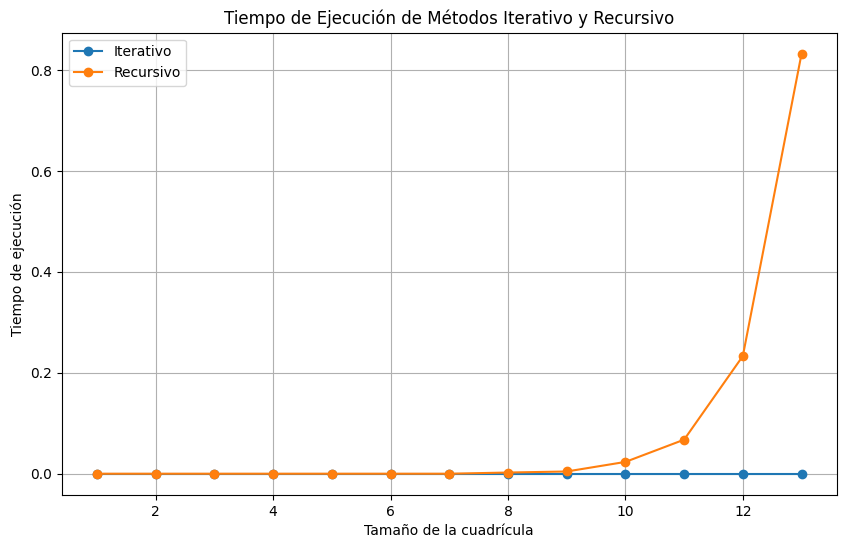

Número de caminos (iterativo): 24310
Número de caminos (recursivo): 24310
{'calcular_caminos': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023641586303710938, 0.0, 0.004418134689331055, 0.0, 0.023398637771606445, 0.0, 0.06749629974365234, 0.0, 0.2332015037536621, 0.0, 0.8322293758392334, 0.0, 0.014480352401733398]}


In [20]:
import time
import matplotlib.pyplot as plt

tiempos_de_ejecucion = {}

def almacenar_tiempo(func):

    def envoltura(*args, **kwargs):
        inicio = time.time()
        resultado = func(*args, **kwargs)
        fin = time.time()
        tiempo = fin - inicio
        if func.__name__ not in tiempos_de_ejecucion:
            tiempos_de_ejecucion[func.__name__] = []
        tiempos_de_ejecucion[func.__name__].append(tiempo)
        return resultado
    return envoltura

class CaminosPCB:
    def __init__(self, n, m):
        self.n = n  
        self.m = m  

    def contar_caminos_iterativo(self):
        dp = [[0] * self.m for _ in range(self.n)]        
        for i in range(self.n):
            dp[i][0] = 1  
        for j in range(self.m):
            dp[0][j] = 1  
        
        for i in range(1, self.n):
            for j in range(1, self.m):
                dp[i][j] = dp[i-1][j] + dp[i][j-1]
        
        return dp[self.n-1][self.m-1]

    def contar_caminos_recursivo(self, i=None, j=None):
        if i is None or j is None:
            i, j = self.n - 1, self.m - 1
        
        if i == 0 or j == 0:
            return 1
        return self.contar_caminos_recursivo(i-1, j) + self.contar_caminos_recursivo(i, j-1)

    @almacenar_tiempo  
    def calcular_caminos(self, metodo='iterativo'):
        if metodo == 'iterativo':
            return self.contar_caminos_iterativo()
        elif metodo == 'recursivo':
            return self.contar_caminos_recursivo()
        else:
            raise ValueError("Método no soportado. Use 'iterativo' o 'recursivo'.")

def generar_graficos_tiempo_ejecucion():
    tamaños = range(1, 14)  
    tiempos_iterativo = []
    tiempos_recursivo = []

    for n in tamaños:
        caminos = CaminosPCB(n, n)        
        caminos.calcular_caminos(metodo='iterativo')
        tiempos_iterativo.append(tiempos_de_ejecucion['calcular_caminos'][-1])        
        caminos.calcular_caminos(metodo='recursivo')
        tiempos_recursivo.append(tiempos_de_ejecucion['calcular_caminos'][-1])
    
    # Gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(tamaños, tiempos_iterativo, label='Iterativo', marker='o')
    plt.plot(tamaños, tiempos_recursivo, label='Recursivo', marker='o')
    plt.title('Tiempo de Ejecución de Métodos Iterativo y Recursivo')
    plt.xlabel('Tamaño de la cuadrícula')
    plt.ylabel('Tiempo de ejecución')
    plt.legend()
    plt.grid(True)
    
    # Formato SVG
    plt.savefig('tiempos_de_ejecucion.svg', format='svg')
    plt.show()

generar_graficos_tiempo_ejecucion()

caminos = CaminosPCB(9, 10)  

resultado_iterativo = caminos.calcular_caminos(metodo='iterativo')
print(f"Número de caminos (iterativo): {resultado_iterativo}")

resultado_recursivo = caminos.calcular_caminos(metodo='recursivo')
print(f"Número de caminos (recursivo): {resultado_recursivo}")

print(tiempos_de_ejecucion)